In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

from data_utils import RadiographyDataset, train_model, produce_stats
from model import Transformer

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=1), 
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.5], std=[0.5]) 
])

In [4]:
train_dataset = RadiographyDataset(metadata_path = "metadata.csv", transform=transform, file_type="train")
test_dataset = RadiographyDataset(metadata_path = "metadata.csv", transform=transform, file_type="test")
val_dataset = RadiographyDataset(metadata_path = "metadata.csv", transform=transform, file_type="val")

In [5]:
trainloader = DataLoader(train_dataset, batch_size=32, num_workers=8, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=32, num_workers=8, shuffle=False)
valloader = DataLoader(val_dataset, batch_size=32, num_workers=8, shuffle=False)

In [6]:
model = Transformer(ntoken = 224, 
                    d_model = 64,
                    nhead = 2, 
                    d_hid = 16,
                    nlayers = 4,
                    seq_len = 224).to(device)

Epoch 1/4, Train Loss: 1.2078, Val Loss: 1.1855


Epoch 2/4, Train Loss: 1.1932, Val Loss: 1.1882


Epoch 3/4, Train Loss: 1.1913, Val Loss: 1.1863


Epoch 4/4, Train Loss: 1.1893, Val Loss: 1.1911


Test Loss: 1.2081, Test Accuracy: 0.4748


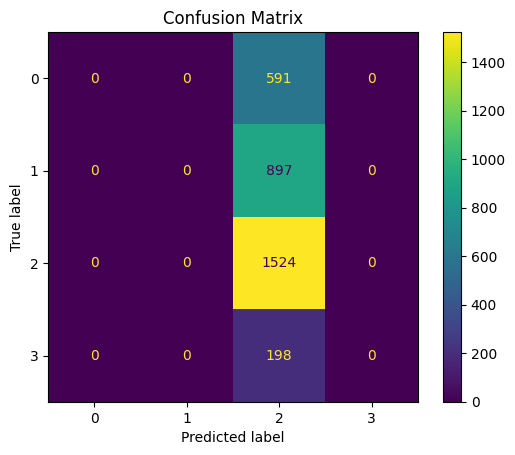

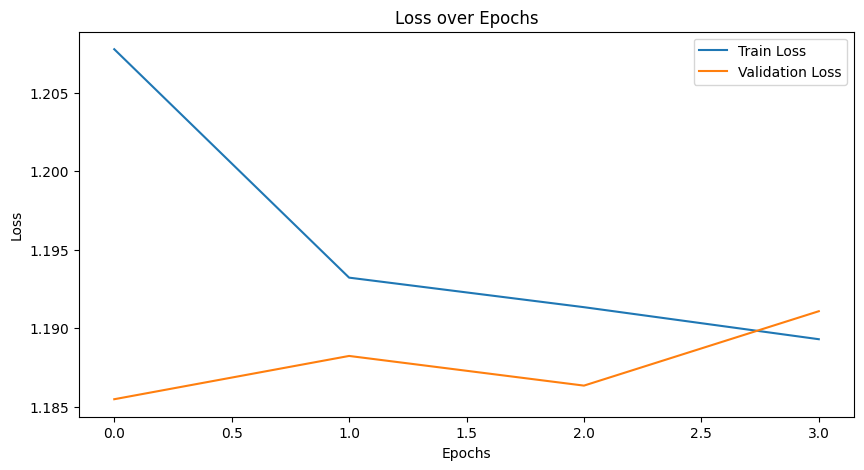

In [7]:
model_trained, train_loss_, val_loss_ = train_model(model, trainloader, valloader, device, num_epochs = 4)
model_dict = produce_stats(model_trained, testloader, train_loss_, val_loss_, device)

In [8]:
torch.save(model_dict, "model/transformer.pt")